In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [247]:
df = pd.read_csv('salary_data.csv')

In [248]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [249]:
df.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [250]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [252]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [253]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

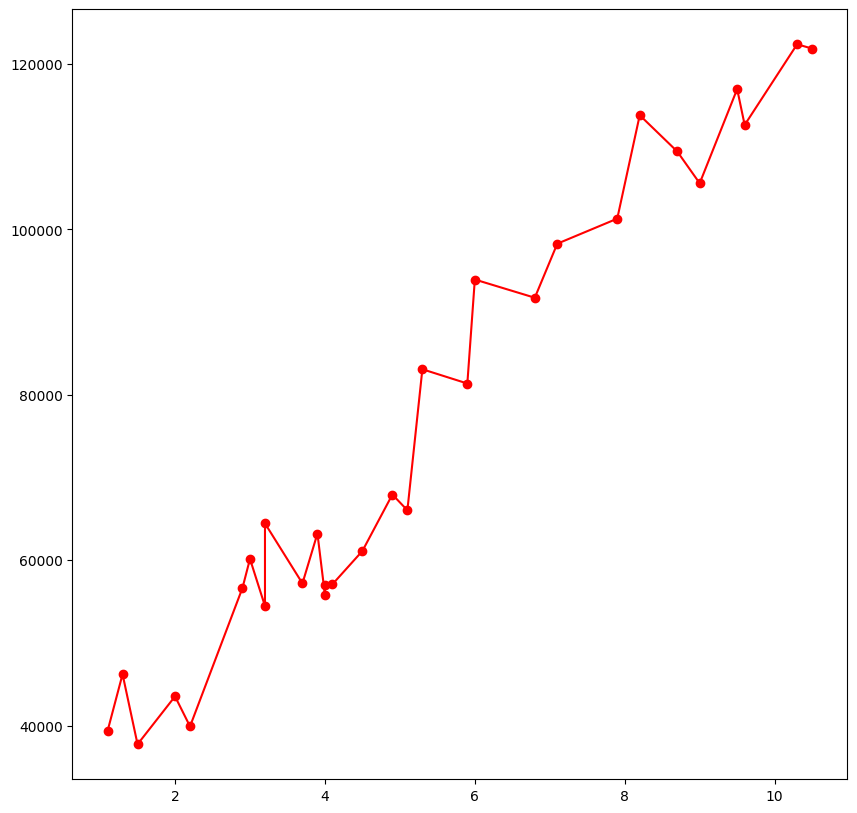

In [254]:
plt.figure(figsize=(10,10))
x = df['YearsExperience']
y = df['Salary']
plt.plot(x,y,marker='o',color='red')

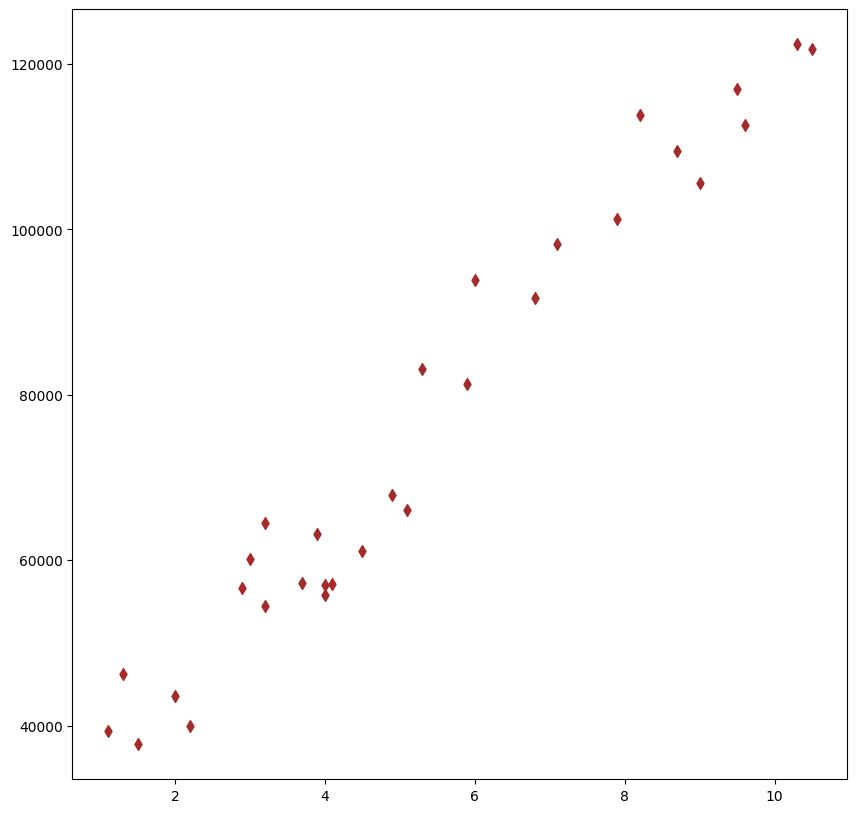

In [255]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,marker='d',color='brown')

<BarContainer object of 30 artists>

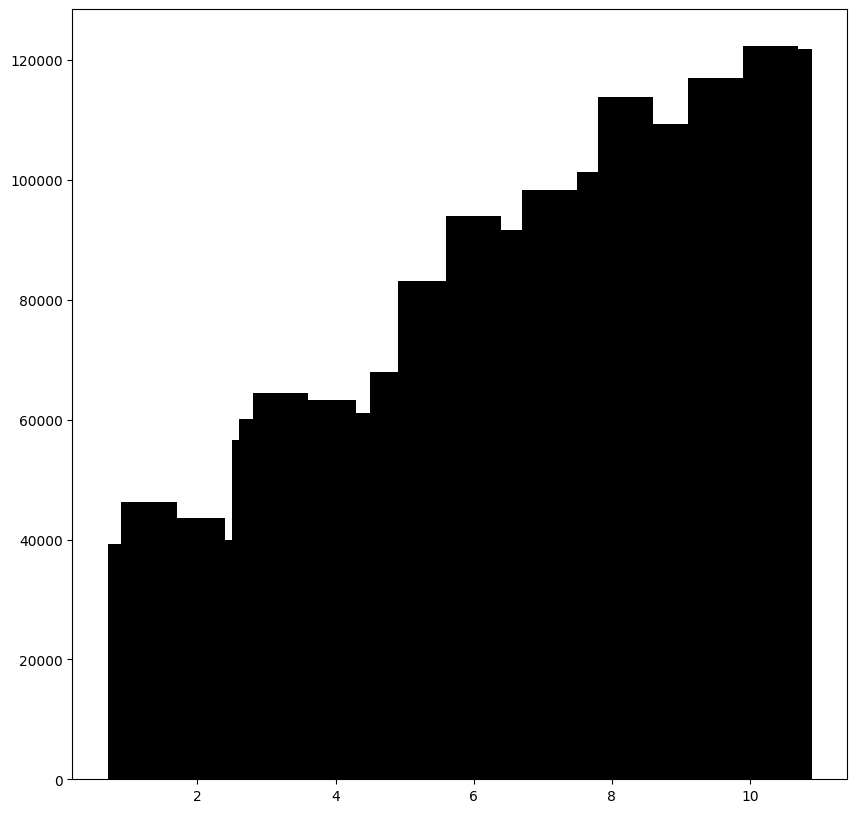

In [256]:
plt.figure(figsize=(10,10))
plt.bar(x,y,color='black')

(array([2., 1., 1., 1., 0., 1., 3., 0., 2., 3., 1., 0., 2., 1., 0., 2., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 2.]),
 array([ 1.1       ,  1.41333333,  1.72666667,  2.04      ,  2.35333333,
         2.66666667,  2.98      ,  3.29333333,  3.60666667,  3.92      ,
         4.23333333,  4.54666667,  4.86      ,  5.17333333,  5.48666667,
         5.8       ,  6.11333333,  6.42666667,  6.74      ,  7.05333333,
         7.36666667,  7.68      ,  7.99333333,  8.30666667,  8.62      ,
         8.93333333,  9.24666667,  9.56      ,  9.87333333, 10.18666667,
        10.5       ]),
 <BarContainer object of 30 artists>)

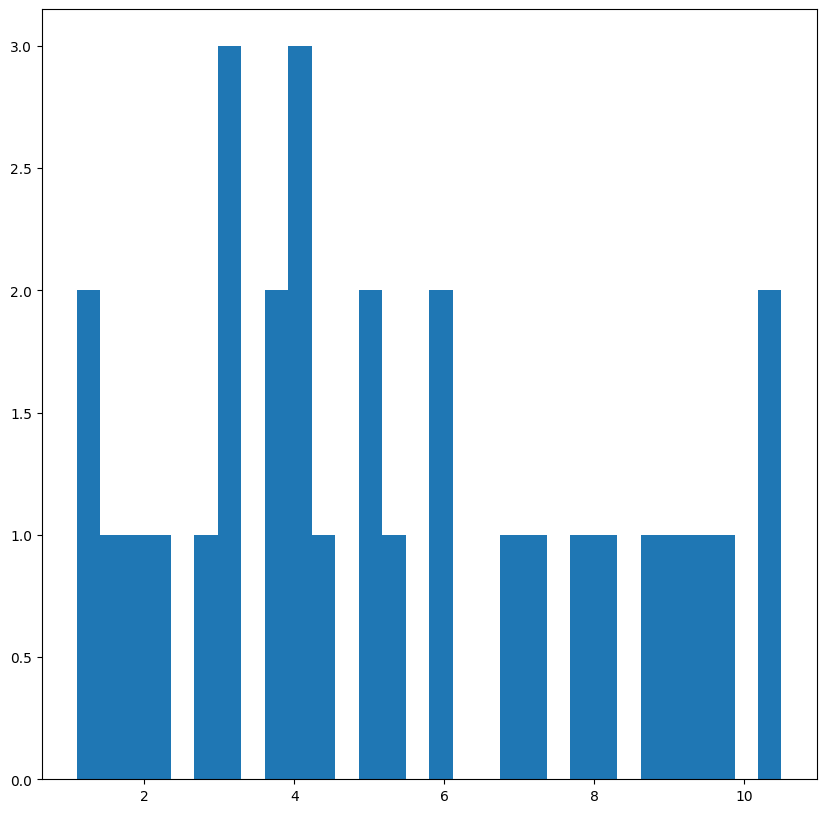

In [257]:
plt.figure(figsize=(10,10))
plt.hist(x,bins=30)

## Data Ka spread ##

<Axes: xlabel='Salary', ylabel='Count'>

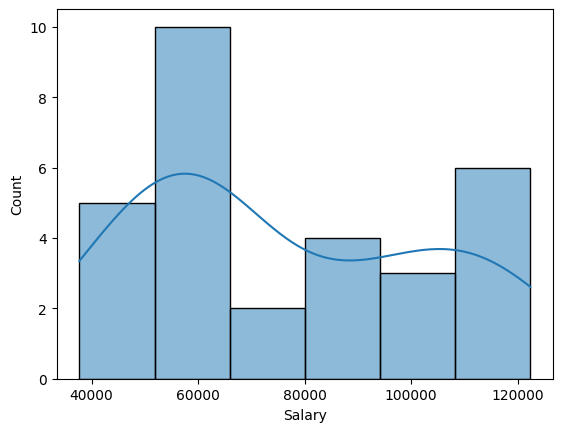

In [258]:
sns.histplot(y,kde=True)

<Axes: xlabel='Salary', ylabel='Count'>

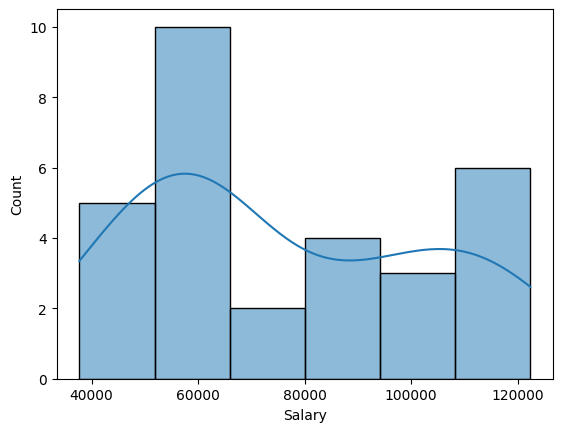

In [259]:
sns.histplot(df['Salary'],kde=True)

<Axes: ylabel='Salary'>

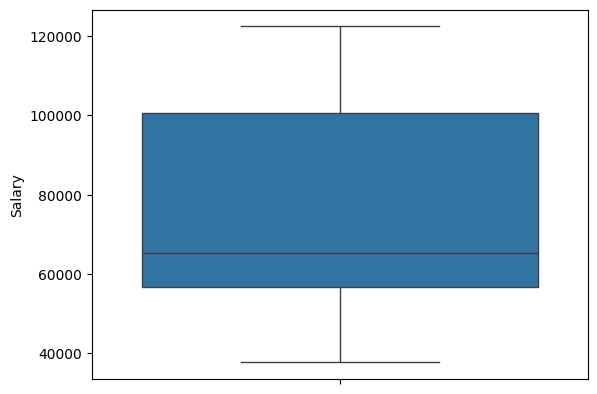

In [260]:
sns.boxplot(y)

## Relationship check karna (2 variables ka relation) ##

In [261]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

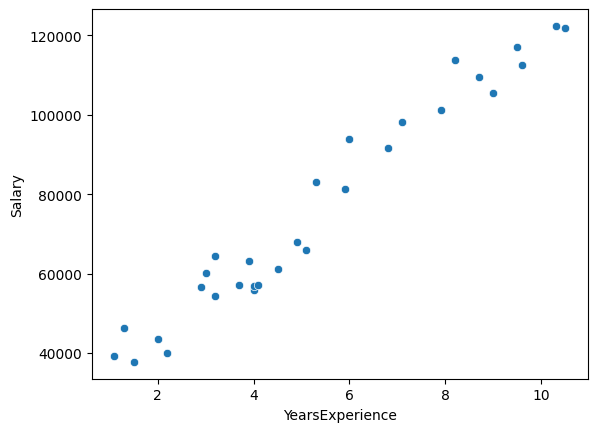

In [262]:
sns.scatterplot(x = 'YearsExperience',y = 'Salary', data = df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

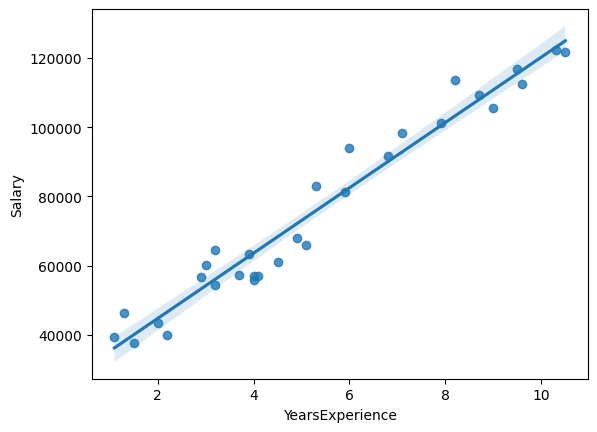

In [263]:
sns.regplot(x='YearsExperience',y='Salary',data = df)

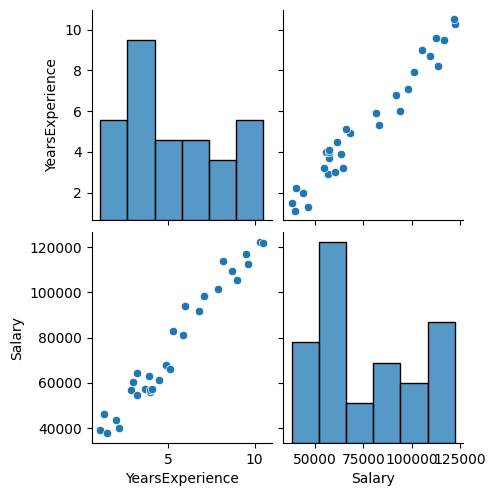

In [264]:
sns.pairplot(df)

In [265]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

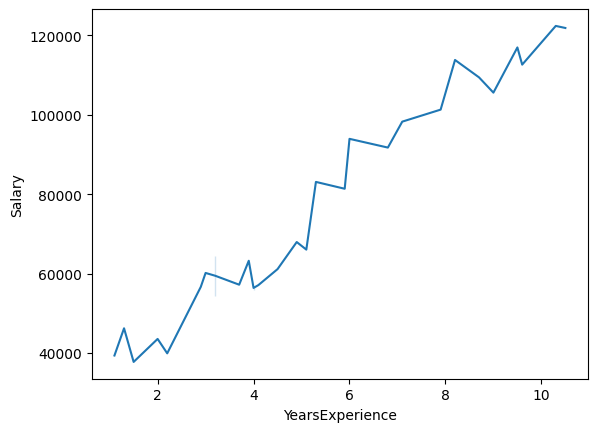

In [266]:
sns.lineplot(x='YearsExperience', y='Salary', data=df)


In [267]:
x = df.drop('Salary',axis=1)

In [268]:
y = df['Salary']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42)

In [270]:
model = LinearRegression()

In [271]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [272]:
pred = model.predict(X_test)

In [273]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
16     66029.0
Name: Salary, dtype: float64

In [274]:
pred

array([115941.4335911 ,  72302.50533756, 102942.60389856,  76016.45667829,
        56518.21213947,  61160.65131538, 122440.84843738, 107585.04307447,
        63946.11482092,  37019.96760065,  47233.33378765,  74159.48100792])

In [275]:
model.score(X_test,y_test)

0.9532338376280692

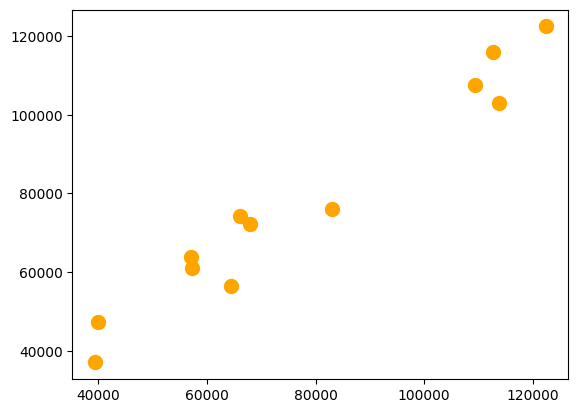

In [276]:
plt.scatter(y_test,pred,marker='o',color='orange',s=100)

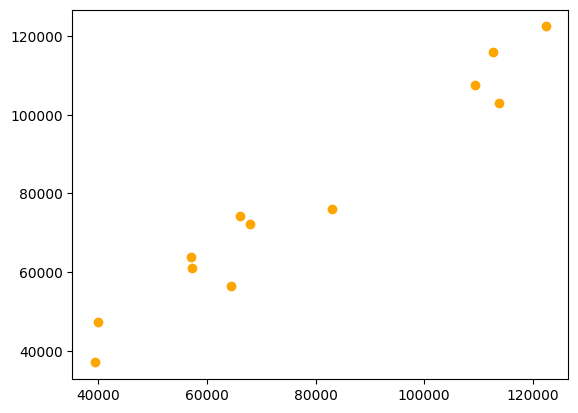

In [277]:
plt.scatter(y_test,pred,marker='o',color='orange')

## residual data ##

In [278]:
residual_data = y_test-pred

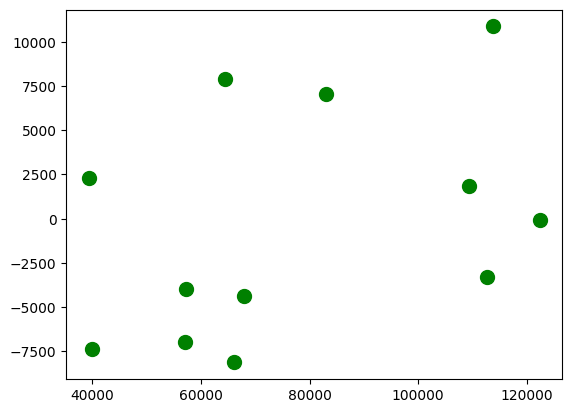

In [279]:
plt.scatter(y_test,residual_data,marker='o',color='green',s=100)

In [280]:
r2_score(y_test,pred)

0.9532338376280692

In [281]:
mean_squared_error(y_test,pred)

37867393.38893943

In [282]:
# Used to standardise statsmodel in python
f = np.ones((30,1))
df.insert(0,'extra',f)

In [283]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [284]:
# Gives summary of data model->gives value of r-square and adjusted r-square
import statsmodels.api as sm
X_opt = df.iloc[:,:-1]
Y1 = df.iloc[:,-1]

In [285]:
regressor_OLS = sm.OLS(endog = Y1, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           1.14e-20
Time:                        05:09:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
extra            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2nd case #

In [287]:
# Used to standarise statsmodel in python
if 'extra' in df.columns:
    df.drop('extra', axis=1, inplace=True)

f = np.ones((df.shape[0], 1))
df.insert(0, 'extra', f)


In [288]:
# Inserting a new column to dataset having employee ids
g =[]
for i in range(1, 31):
    g.append(i)

df.insert(2, 'Id', g)

In [289]:
# Gives summary of data model->gives value of r-square and adjusted r-square
X_opt = df.iloc[:,:-1]
Y1 = df.iloc[:,-1]

In [290]:
regressor_OLS = sm.OLS(endog = Y1, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     304.9
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           2.94e-19
Time:                        05:14:49   Log-Likelihood:                -301.21
No. Observations:                  30   AIC:                             608.4
Df Residuals:                      27   BIC:                             612.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
extra            2.543e+04   2367.288     10.740      0.000    2.06e+04    3.03e+04
YearsExperience  1.093e+04   2334.128      4.682      0.000    6138.422    1.57e+04
Id               -482.8918    752.435     -0.642      0.526   -2026.761    1060.978
==============================================================================
Omnibus:                        2.376   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.093
Skew:                           0.557   Prob(JB):                        0.351
Kurtosis:                       2.343   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""